# 1일차 Review : 같은 문제 다시 풀어보기
---
- 학습은 10번만!

In [1]:
# 유방암 진단 데이터
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
x = cancer.data
y = cancer.target

In [4]:
x.shape, y.shape

((569, 30), (569,))

In [7]:
import pandas as pd

pd.DataFrame(x, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# pd.DataFrame(y, columns=cancer.target)
# 에러나는 이유 >> 암인지 아닌지 구분은 할 수 있는데 숫자상으론 알 수 없기 때문에 에러나고, one-hot encoding을 하면 나타날 수 있음
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
#####################
# train set / test set 분리
# 조건 1. test set size = 20%
# 조건 2. 난수 고정 random seed = 2023
#####################
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

In [6]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras

import numpy as np

import matplotlib.pyplot as plt

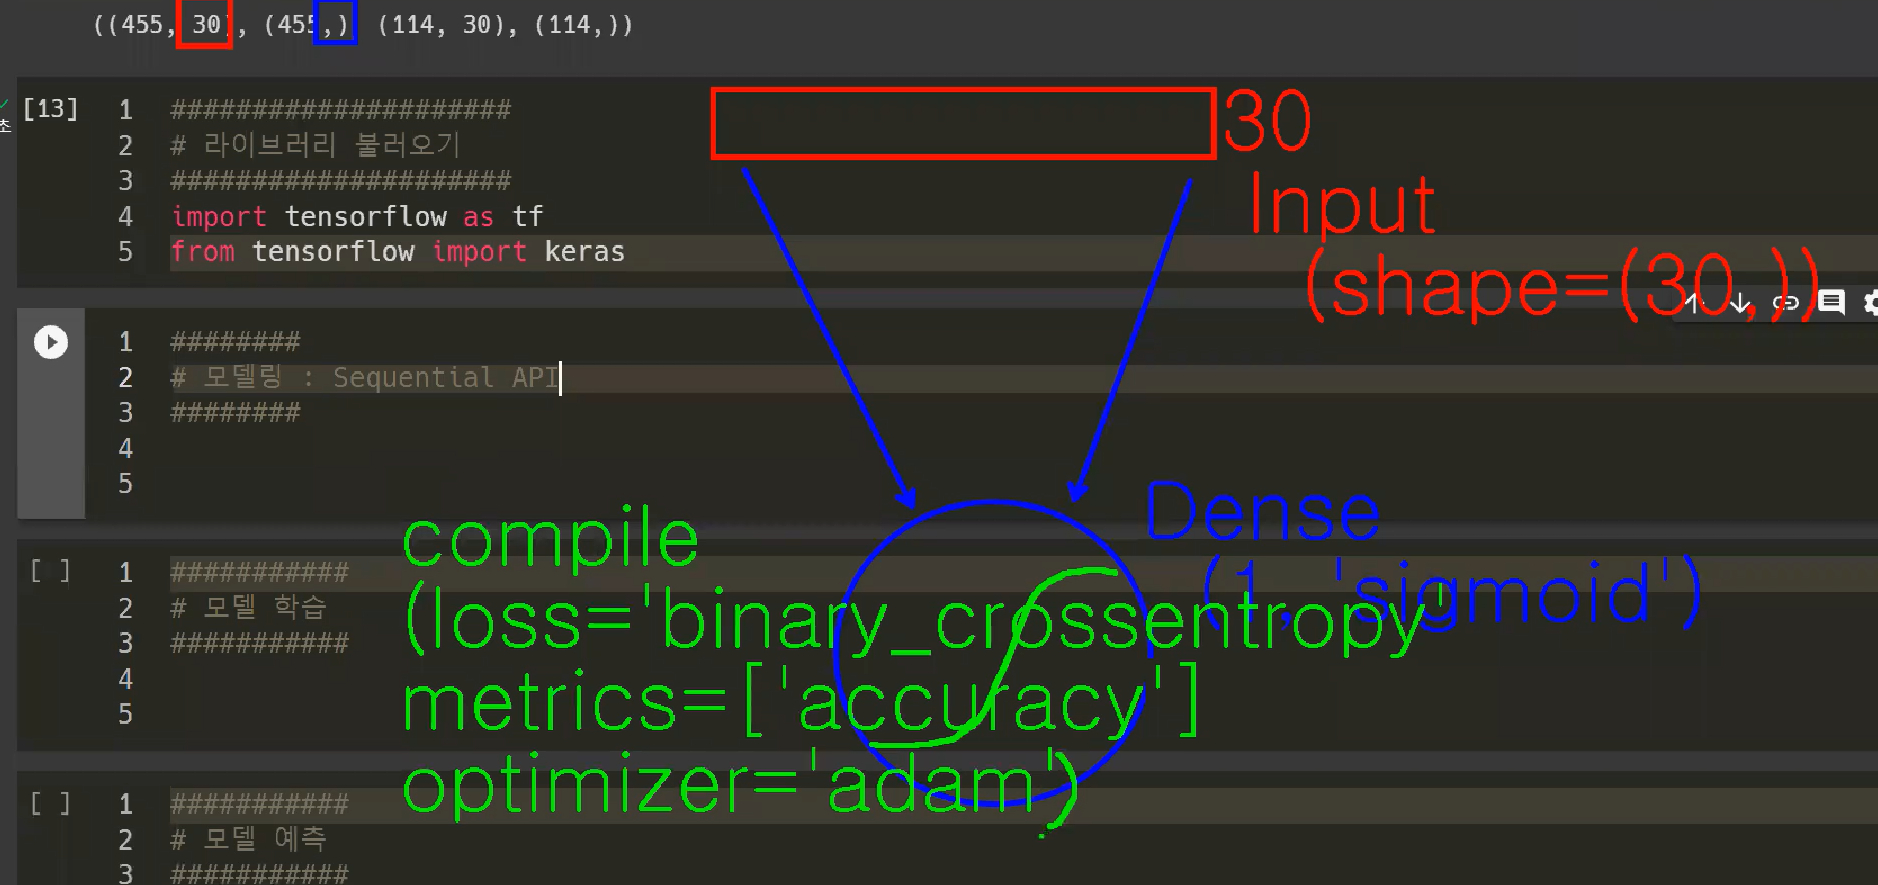

In [15]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립 
model.add(keras.layers.Input(shape=(30,)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))
# 4. 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam' )
# 양념
model.summary()
# 시퀀셜 에이피아이의 특징은 인풋레이어가 표기되지 않는 것이다. 다른 방법은 서머리에서 인풋 레이어가 표시되는데.. 여기에선 안 보인다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [21]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
15/15 [==============================] - 0s 3ms/step - loss: 15.1492 - accuracy: 0.1319
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 14.2266 - accuracy: 0.1253
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 13.4118 - accuracy: 0.1275
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 12.3926 - accuracy: 0.1297
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 11.4555 - accuracy: 0.1473
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 10.6127 - accuracy: 0.1582
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 9.7397 - accuracy: 0.1736
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 8.9077 - accuracy: 0.1890
Epoch 9/10
15/15 [==============================] - 0s 4ms/step - loss: 8.0813 - accuracy: 0.2000
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 7.4188 - accuracy: 0.2505


In [22]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)


4/4 [==============================] - 0s 2ms/step


In [23]:
y_pred[:10]

array([[8.5823739e-01],
       [9.8653430e-01],
       [7.6146334e-01],
       [9.9997067e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.7878235e-02],
       [9.6316475e-01],
       [2.0889756e-05],
       [5.9031010e-01]], dtype=float32)

In [25]:
y_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

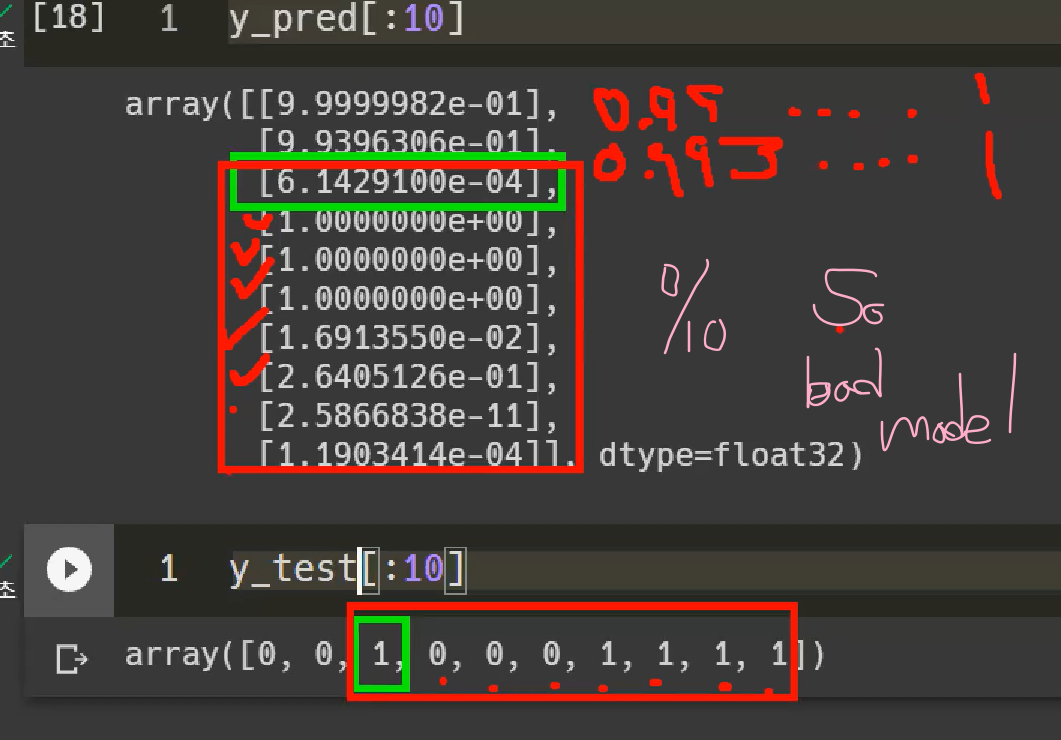

# 히든 레이어 추가하여 모델링!
---
- 조건
    - 히든 레이어 2개를 추가하여 다시 모델링!
    - 히든 레이어 노드 수 : 32
    - 히든 레이어 activation = 'relu'

In [32]:
########
# 모델링
########
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립
model.add(keras.layers.Input(shape=(30,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 4. 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


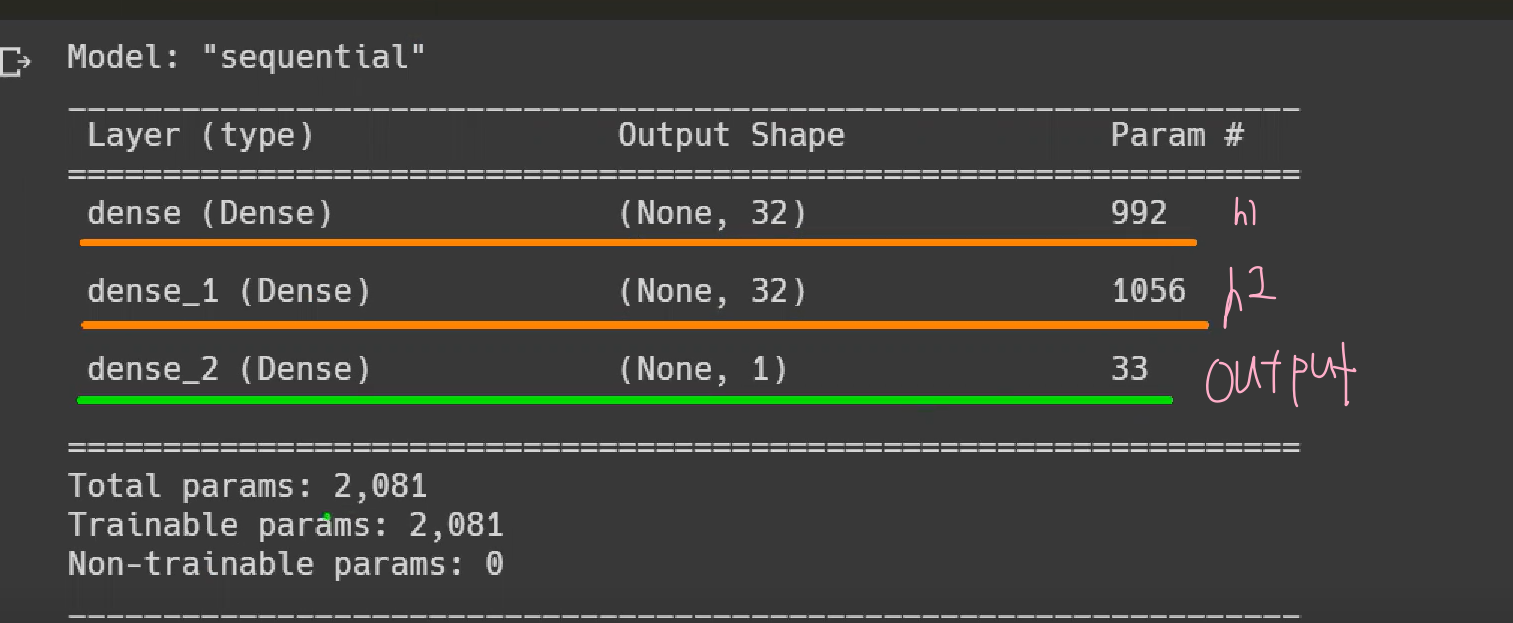

In [33]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, verbose=1)


Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 26.0947 - accuracy: 0.4484
Epoch 2/10
15/15 [==============================] - 0s 3ms/step - loss: 3.3924 - accuracy: 0.7604
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.8484
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.8703
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.9011
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8879
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4583 - accuracy: 0.8879
Epoch 8/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4487 - accuracy: 0.8879
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.8637
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.4709 - accuracy: 0.8681


In [34]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)


4/4 [==============================] - 0s 2ms/step


In [35]:
y_pred[:10]

array([[8.5100492e-06],
       [8.8613564e-01],
       [5.1325566e-01],
       [1.4305058e-12],
       [6.0944568e-32],
       [2.0320101e-13],
       [8.9462012e-01],
       [3.1935934e-02],
       [3.9981651e-01],
       [9.8826456e-01]], dtype=float32)

In [37]:
y_test[:10]

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1])

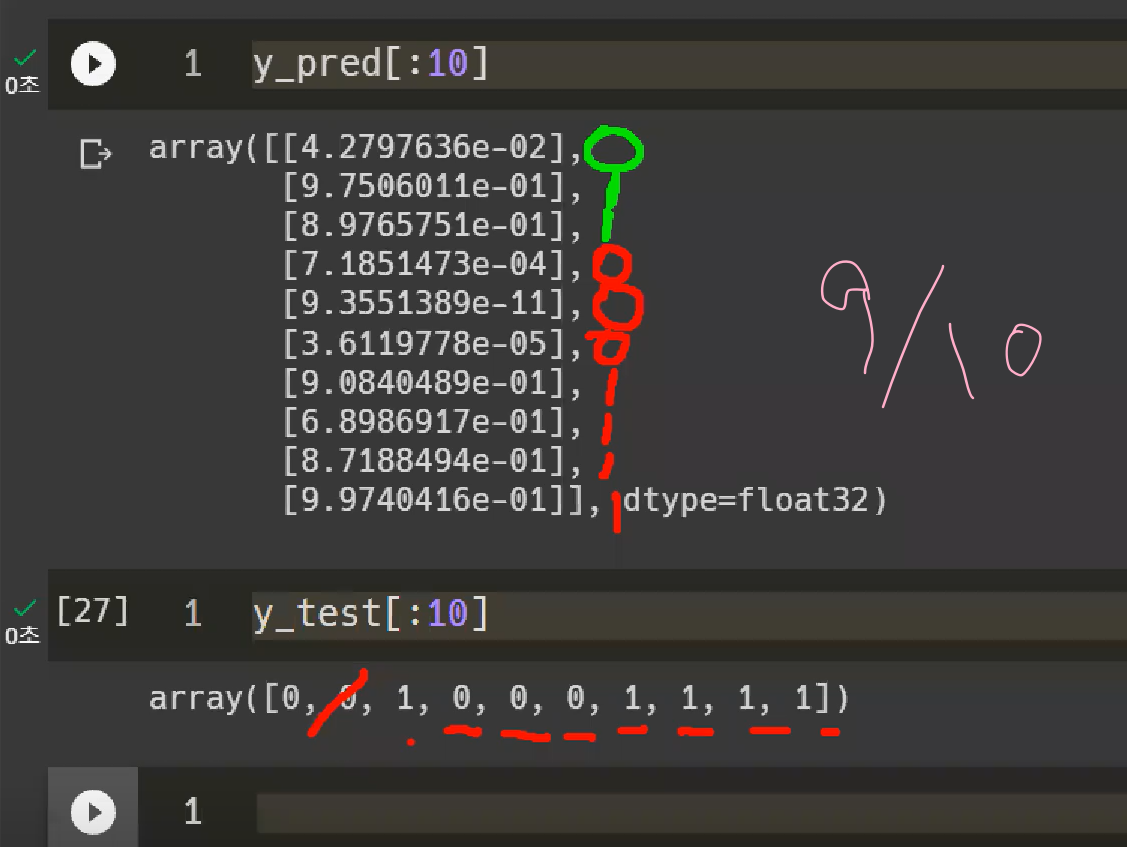